In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read data files and update column names
x_train=pd.read_csv('X_train.csv', header=None)
y_train=pd.read_csv('y_train.csv', header=None)
x_test=pd.read_csv('X_test.csv', header=None)
y_test=pd.read_csv('y_test.csv', header=None)

y_test = y_test.as_matrix()
y_train = y_train.as_matrix()
x_test = x_test.as_matrix()
x_train = x_train.as_matrix()

from scipy.spatial import distance

/Users/mollyhanson/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
### PART A

def getKernel(b,x1,x2):
    
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    kern_list = []
    kern_ij = pd.DataFrame()

    for x_i in range(0,n1):
        i = x1[x_i,:]
        for x_j in range(0,n2):
            j = x2[x_j,:]
            dist = distance.euclidean(i, j)
            dists = np.square(dist)
            kern = np.exp(-dists/b)
            kern_list.append(kern)
    K = np.array(kern_list)
    K_ij = K.reshape(len(x1),len(x2))

    return K_ij



def mu(b, var, xn, xx):
    Kn = getKernel(b,xn,xn)
    Kx = getKernel(b,xx,xn)
    I = np.identity(len(xn))
    V = (var*I)+Kn
    V_inv = np.linalg.inv(V)
    mu_x = np.dot((np.dot(Kx,V_inv)),y_train)
    
    return mu_x

In [3]:
### PART B
# Predict on X-test and Calculate RMSE

vals_b = [5,7,9,11,13,15]
vals_var = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

def getRMSE(b,var):
    RMSE_list = []
    for b in vals_b:
        for var in vals_var:
            print b, var
            pred = mu(b,var,x_train,x_test)
            RMSE = np.sqrt(np.mean((pred-y_test)**2))
            RMSE_list.append((b,var,RMSE))
    return RMSE_list

In [14]:
getKernel(5,x_train,x_train)

array([[ 1.        ,  0.7115299 ,  0.36977171, ...,  0.11716528,
         0.53499833,  0.23803543],
       [ 0.7115299 ,  1.        ,  0.29806524, ...,  0.40927321,
         0.51508901,  0.25798781],
       [ 0.36977171,  0.29806524,  1.        , ...,  0.07063862,
         0.17776147,  0.02953842],
       ..., 
       [ 0.11716528,  0.40927321,  0.07063862, ...,  1.        ,
         0.22676265,  0.07884375],
       [ 0.53499833,  0.51508901,  0.17776147, ...,  0.22676265,
         1.        ,  0.43885452],
       [ 0.23803543,  0.25798781,  0.02953842, ...,  0.07884375,
         0.43885452,  1.        ]])

In [4]:
totalRMSE = getRMSE(vals_b,vals_var)
RMSE_vals = [x[2] for x in totalRMSE]
RMSE_array = np.array(RMSE_vals)
RMSE_table = RMSE_array.reshape(len(vals_b),len(vals_var))
df = pd.DataFrame(RMSE_table)
df
print "The lowest RMSE is", np.min(df.iloc[:,:].values), "when b=11 and var=0.1"

5 0.1
5 0.2
5 0.3
5 0.4
5 0.5
5 0.6
5 0.7
5 0.8
5 0.9
5 1
7 0.1
7 0.2
7 0.3
7 0.4
7 0.5
7 0.6
7 0.7
7 0.8
7 0.9
7 1
9 0.1
9 0.2
9 0.3
9 0.4
9 0.5
9 0.6
9 0.7
9 0.8
9 0.9
9 1
11 0.1
11 0.2
11 0.3
11 0.4
11 0.5
11 0.6
11 0.7
11 0.8
11 0.9
11 1
13 0.1
13 0.2
13 0.3
13 0.4
13 0.5
13 0.6
13 0.7
13 0.8
13 0.9
13 1
15 0.1
15 0.2
15 0.3
15 0.4
15 0.5
15 0.6
15 0.7
15 0.8
15 0.9
15 1
The lowest RMSE is 1.89050711498 when b=5 and var=0.4


In [ ]:
### PART D

In [6]:
x_testdf = pd.DataFrame(x_test)
x_traindf = pd.DataFrame(x_train)

x_test4 = x_testdf.iloc[:,3].as_matrix()
x_train4 = x_traindf.iloc[:,3].as_matrix()

xtrain4_col = x_train4[:,None]
xtest4_col = x_test4[:,None]

mu4_train = mu(5,2,xtrain4_col,xtrain4_col)

In [7]:
plot4_df = pd.DataFrame(x_train4)
plot4_df.columns = ['x4']

y_traindf = pd.DataFrame(y_train)
y_traindf.columns = ['y']

mu4_traindf = pd.DataFrame(mu4_train)
mu4_traindf.columns = ['mu_4']

plot = pd.concat([plot4_df, y_traindf], axis=1)
plot2 = pd.concat([plot, mu4_traindf], axis=1)


result=plot2.sort_values(by=["x4"])



In [9]:
result = result.as_matrix()

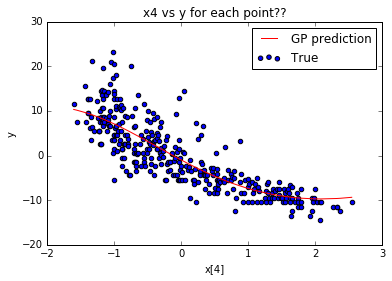

In [10]:
x_plot = result[:,0]
y_plot = result[:,1]
pred_plot = result[:,2]

plt.scatter(x_plot,y_plot)
plt.plot(x_plot,pred_plot,'-r')
plt.xlabel('x[4]')
plt.ylabel('y')
plt.title('x[4] versus y for each point')
plt.legend(['GP prediction','True'])